# HSE 2023: Введение в машинное обучение БИ 22/23

## Домашнее задание № 4


# Внимание!

* Некоторые задания требуют значительного времени для выполнения, поэтому **лучше приступить к выполнению домашнего задания как можно раньше** 

* Решения обязательно должны содержать комментарии, все полученные результаты должны сопровождаться выводами (для этого удобно использовать ячейки markdown)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = (11, 5)
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

from IPython.display import display

import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

# Часть 1. Дерево решений

### Задание 1  (1 балл)

Загрузите датасет boston и разделите его на тренировочную ($75\%$) и тестовую ($25\%$) части. Обучите дерево глубины 1 и постройте следующий график:

- Scatter plot для точек обучающей выборки (Выбранный моделью признак по оси x, целевая переменая по оси y)
- Обученная модель

In [3]:
df = pd.read_csv("C:/Users/Egor/Desktop/jupyter/hse_ml_course/Datasets/boston.csv", delimiter='\s+', header = None)

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = column_names

Датасет "***boston***" содержит следующие столбцы:

1. **CRIM:** Уровень преступности на душу населения по городам.
2. **ZN:** Доля земли под жилую застройку, зонированная под участки более 25 000 кв. футов.
3. **INDUS:** Доля акров, не относящихся к розничной торговле на город.
4. **CHAS:** Фиктивная переменная реки Чарльз (равна 1, если участок ограничивает реку; 0 в противном случае).
5. **NOX:** Концентрация оксидов азота (частей на 10 миллионов).
6. **RM:** Среднее количество комнат в доме.
7. **AGE:** Доля занимаемых владельцами домов, построенных до 1940 года.
8. **DIS:** Среднее расстояние до пяти бостонских центров занятости.
9. **RAD:** Индекс доступности радиальных автомобильных дорог.
10. **TAX:** Полная ставка налога на имущество на 10 000 долларов.
11. **PTRATIO:** Соотношение учеников и учителей по городам.
12. **B:** 1000(Bk - 0.63)^2, где Bk - доля людей афроамериканского происхождения по городам.
13. **LSTAT:** Процент населения с более низким социальным статусом.
14. **MEDV:** Медианная стоимость домов, занимаемых владельцами, в тысячах долларов.

В качетсве таргета(целевой переменной) возьмем столбец **MEDV**.

Наш датасет имеет много различных и интересных параметров. Проведем первичный анализ данных ***(EDA)***, чтобы иметь представление, с какими данными нам предстоит работать.

На первый взгляд, без применения математических инструментов можно рассмотреть, каким образом параметры датасета могут оказывавать влияние на целевую переменную.

* **CRIM** (уровень преступности): Высокий уровень преступности может негативно сказываться на стоимости недвижимости, поскольку это может влиять на безопасность и привлекательность района.
* **RM** (среднее количество комнат): Большее количество комнат может быть связано с более просторными и, вероятно, более дорогими домами, поэтому ожидается положительная корреляция с ценой.
* **AGE** (доля старых домов): Старые дома могут иметь более высокие затраты на обслуживание и ремонт, что может негативно сказываться на цене.
* **DIS** (среднее расстояние до центров занятости): Близость к центрам занятости может быть привлекательной для покупателей, так как это может обеспечивать удобство и уменьшать время на перемещение к потенциальным местам работы.
* **RAD** (индекс доступности автомобильных дорог): Хорошая доступность радиальных автомобильных дорог может быть привлекательной для покупателей, поскольку это может обеспечить легкость перемещения и доступность других районов.
* **PTRATIO** (соотношение учеников и учителей): Более низкое соотношение учеников и учителей может указывать на более высокий уровень образования в районе, что может быть привлекательным для семей с детьми.
* **LSTAT** (процент населения с низким социальным статусом): Высокий процент населения с низким социальным статусом может указывать на более низкий уровень жизни в районе. Скорее всего у этого параметра будет отрицательная корреляция с целевой переменной.
* **ZN** (доля земли под жилую застройку): Этот столбец указывает на долю земли, зонированную под участки более 25 000 кв. футов. Более высокая доля может свидетельствовать о наличии просторных участков и, возможно, более дорогих домов.
* **INDUS** (доля акров, не относящихся к розничной торговле): Этот столбец показывает долю акров, используемых для промышленности, не связанной с розничной торговлей. Более высокое значение может указывать на наличие рядом промышленных районов. У этого параметра скорее всего тоже будет отрицательная корреляция с параметром **MEDV**.
* **CHAS** (фиктивная переменная реки Чарльз): Этот столбец принимает значение 1, если участок ограничивает реку Чарльз, и 0 в противном случае. Наличие речной близости может добавить привлекательности и повысить стоимость недвижимости.
* **NOX** (концентрация оксидов азота): Этот столбец указывает на концентрацию оксидов азота в воздухе, измеряемую в частях на 10 миллионов. Высокая концентрация оксидов азота может сигнализировать о загрязнении окружающей среды и негативно влиять на привлекательность района.
* **TAX** (налог на имущество): Этот столбец представляет собой полную ставку налога на имущество на 10 000 долларов. Высокие налоговые ставки могут влиять на привлекательность района и потенциально снижать цену недвижимости.
* **B** (доля людей афроамериканского происхождения): Этот столбец представляет собой показатель, вычисляемый по формуле 1000(Bk - 0.63)^2, где Bk - доля людей афроамериканского происхождения по городам. Высокое значение может указывать на наличие района с высокой долей афроамериканского населения. В том числе и из-за этого столбца из sklearn 1.2 была удалена функция load_boston, поэтому теперь приходится скачивать boston-датасет в виде набора чисел с табуляциями без хедера и описаний))

### Корреляционный анализ

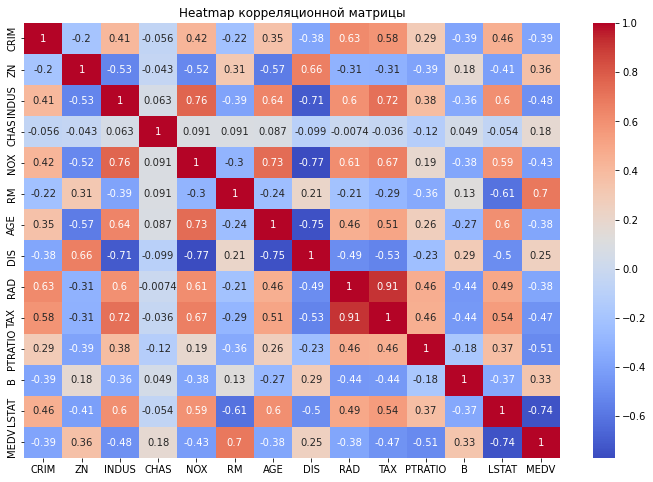

In [4]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap корреляционной матрицы")
plt.show()

In [5]:
corr_matrix['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

Заметим, что все предикторы кроме **CHAS** имеют среднюю или сильную корреляцию с целевой переменной **MEDV**.
На этом основании можем предположить, что наличие речной близости может быть не значительным параметром в рамках формирования цены на недвижимость. 

<br>
Далее имеет смысл проверить предикторы на мультиколлинеарность, ведь сильная корреляция между независимыми переменными может указывать на то, что в рамках нашего набора данных они несут похожу информацию, что в дальнейшем может вызывать проблемы при моделировании. 

In [6]:
abs_corr_matrix = df.corr().abs() 
abs_corr_matrix = abs_corr_matrix.drop(columns=['MEDV'])
abs_corr_matrix = abs_corr_matrix.drop('MEDV')

np.fill_diagonal(abs_corr_matrix.values, 0)

max_correlations = abs_corr_matrix.unstack().sort_values(ascending=False)  

max_correlations = max_correlations[max_correlations >= 0.75] 
pairs_of_variables = max_correlations.reset_index() 
pairs_of_variables = pairs_of_variables[pairs_of_variables['level_0'] != pairs_of_variables['level_1']] 
pairs_of_variables.columns = ['Variable 1', 'Variable 2', 'Correlation']
pairs_of_variables = pairs_of_variables.drop_duplicates(subset=['Variable 1', 'Variable 2'])
pairs_of_variables = pairs_of_variables.iloc[::2]
pairs_of_variables = pairs_of_variables.reset_index(drop=True)

print('Абсолютные значения корреляции для предикторов, большие порога 0.75: \n')
print(pairs_of_variables)

Абсолютные значения корреляции для предикторов, большие порога 0.75: 

  Variable 1 Variable 2  Correlation
0        TAX        RAD     0.910228
1        DIS        NOX     0.769230
2      INDUS        NOX     0.763651


Заметим, что между парами параметров **TAX** и **RAD**, **DIS** и **NOX**, **INDUS** и **NOX** существует сильная корреляция. Вернемся к матрице корреляций, чтобы выяснить какие зависимости между данными параметрами, прямые или обратные, и сделать на основании полученной информации выводы.

<br>

* **TAX** и **RAD**: Ярковыраженная положительная корреляций(коэффициент Пирсона ~0.91). Интуитивно это может показаться странным, но можно предположить, что это может указывать на то, что налог на недвижимость и доступность радиальных магистралей взаимосвязаны. Высокая корреляция между этими переменными может говорить о том, что увеличение налога на недвижимость связано с увеличением доступности радиальных магистралей, и наоборот.

* **DIS** и **NOX**: Сильная отрицательная корреляция(коэффициент Пирсона ~-0.77).  Это может указывать на то, что более высокая концентрация оксидов азота связана с меньшим расстоянием до центров занятости. Это означает то, что районы, находящиеся ближе к центрам занятости, имеют более высокие уровни загрязнения оксидами азота, что вполне логично.

* **INDUS** и **NOX**: Сильная положитаельная корреляция(коэффициент Пирсона ~0.76). Это может указывать на то, что более высокий процент земли, занятой промышленностью, связан с более высокой концентрацией оксидов азота. Таким образом, районы с более высоким промышленным использованием могут иметь более высокий уровень загрязнения оксидами азота.

<br>

Несмотря на то, что данные независимые переменные очень сильно коррелируют друг с другом, мне кажется нельзя говорить о их потенциальном исключении из списка значимых предикторов на основании корреляционного анализа. Да, эти переменные действительно взаимосвязаны, но помимо информации в рамках попарной связи, они несут другую информацию в рамках нашего набора данных.

### Анализ данных на выбросы

Построим **box-plot'ы** для каждого параметра датасета, чтобы визуально оценить их характеристика(в первую очередь нам интересно наличие на графиках **outliers** и **extremes**)

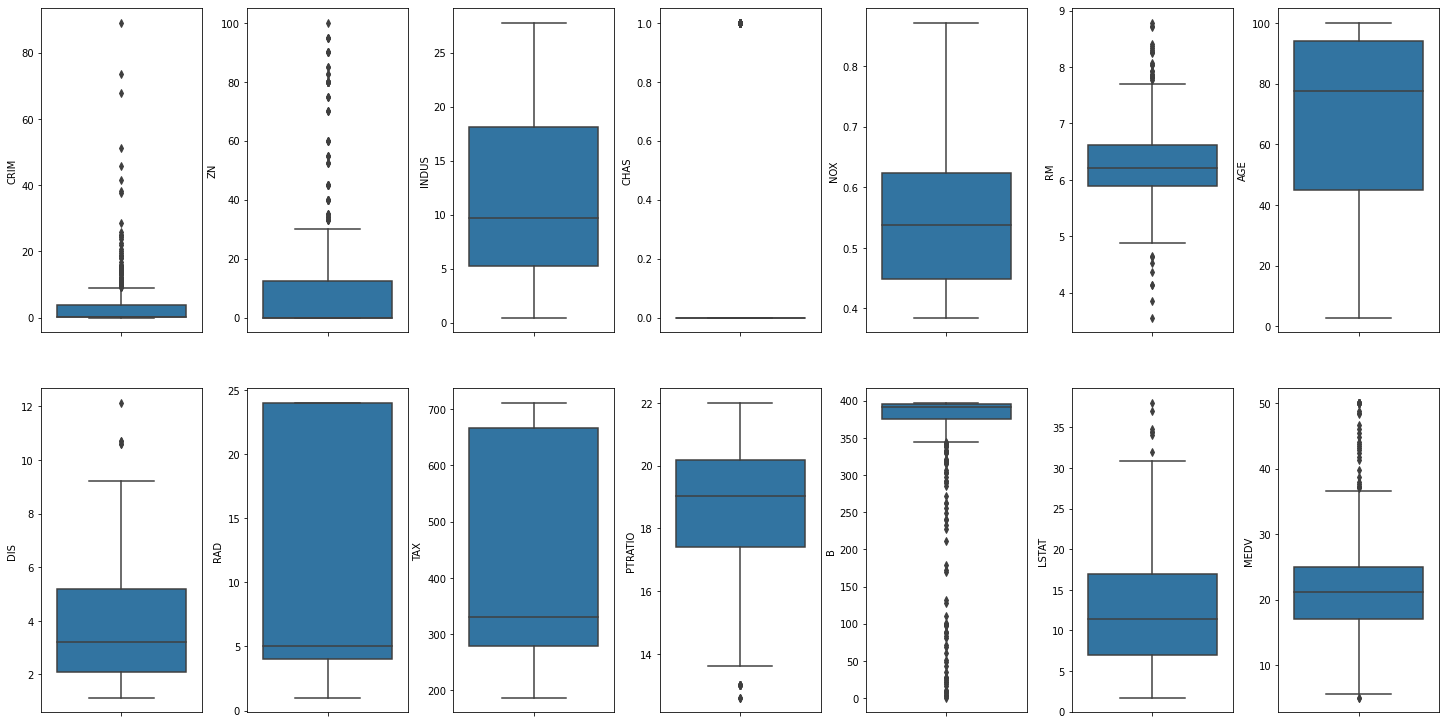

In [7]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Графики **CRIM**, **ZN** и **B** выглядят так, что среди этих данных могут быть выбросы. Попробуем поближе взглянуть на эти параметры опираясь на межквартильный размах.

**Функиция, которая возвращает долю данных, выходящих за границу межквартильного размаха.**

In [8]:
def outliers_fraction(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    fraction = len(df_outliers)/len(df[column])
    return round(fraction, 3)

Найдем какую долю составляют выбросы в каждом столбце нашего датасета:

In [9]:
for column in df.items():
    print(column[0], 'доля выбросов:', outliers_fraction(df, column[0]))

CRIM доля выбросов: 0.13
ZN доля выбросов: 0.134
INDUS доля выбросов: 0.0
CHAS доля выбросов: 0.069
NOX доля выбросов: 0.0
RM доля выбросов: 0.059
AGE доля выбросов: 0.0
DIS доля выбросов: 0.01
RAD доля выбросов: 0.0
TAX доля выбросов: 0.0
PTRATIO доля выбросов: 0.03
B доля выбросов: 0.152
LSTAT доля выбросов: 0.014
MEDV доля выбросов: 0.079


Действительно, в столбцах **CRIM**, **ZN**, **B**, содержится довольно большое количетсво выбросов(если судить по межквартильному размаху) - более 10%. Построим гистограммы распределения данных этих столбцов.

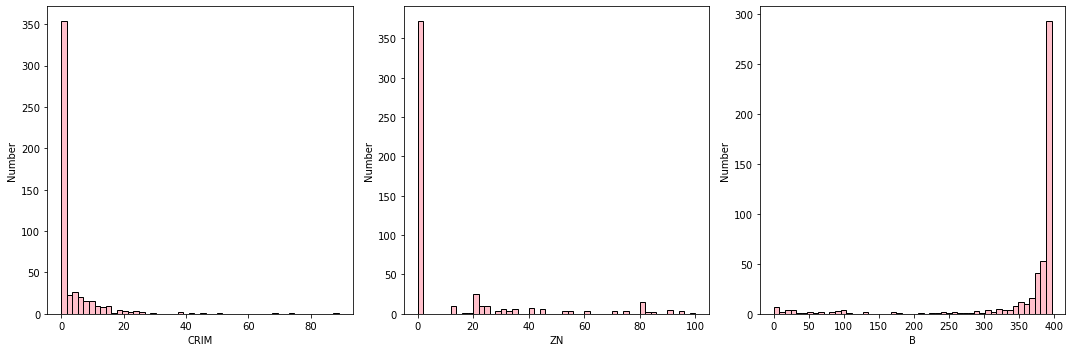

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5)) 

axs[0].hist(df['CRIM'], bins=50, ec='black', color='pink')
axs[0].set_xlabel('CRIM')
axs[0].set_ylabel('Number')

axs[1].hist(df['ZN'], bins=50, ec='black', color='pink')  
axs[1].set_xlabel('ZN')
axs[1].set_ylabel('Number')

axs[2].hist(df['B'], bins=50, ec='black', color='pink') 
axs[2].set_xlabel('B')
axs[2].set_ylabel('Number')

plt.tight_layout() 
plt.show()

Исходя из данных гистограмм, если бы перед нами стоял вопрос о замене значений выбросов в столбцах нашего датасета, то имело бы смысл заменить их на медианные значения, тк эти данные имеют явно-выраженное смещение.

In [11]:
def outliers_replace_median(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df[column] = df[column].apply(lambda x: df[column].median() if x < lower_bound or x > upper_bound else x)

In [12]:
outliers_replace_median(df, 'CRIM')
outliers_replace_median(df, 'ZN')
outliers_replace_median(df, 'B')

Тогда бы это выглядело примерно так:

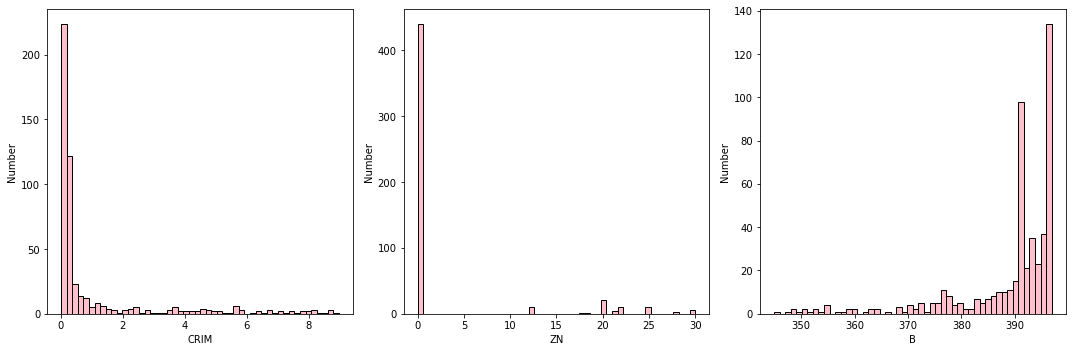

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5)) 

axs[0].hist(df['CRIM'], bins=50, ec='black', color='pink')
axs[0].set_xlabel('CRIM')
axs[0].set_ylabel('Number')

axs[1].hist(df['ZN'], bins=50, ec='black', color='pink')  
axs[1].set_xlabel('ZN')
axs[1].set_ylabel('Number')

axs[2].hist(df['B'], bins=50, ec='black', color='pink') 
axs[2].set_xlabel('B')
axs[2].set_ylabel('Number')

plt.tight_layout() 
plt.show()

Но такая задача перед нами не стоит, тк дальше мы будем работать с деревьями решений, а они в отличие от таких моделей, как например линейная регрессия, в меньшей степени подвержены выбросам в данных. Поэтому вернем данные в исходный вид.

In [14]:
df = pd.read_csv("C:/Users/Egor/Desktop/jupyter/hse_ml_course/Datasets/boston.csv", delimiter='\s+', header = None)

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = column_names

### ^.^

In [15]:
display(df.head())
display(df.info())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

In [16]:
x = df.drop('MEDV', axis=1)
y = df['MEDV']

* Разобьем выборку на тренировочную и тестовую

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

* Обучим модель дерева решений DecisionTreeRegressor

In [18]:
model = DecisionTreeRegressor(max_depth=1)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [19]:
y_pred = model.predict(x_test)

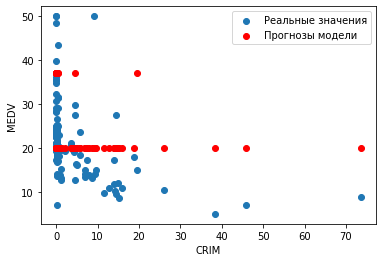

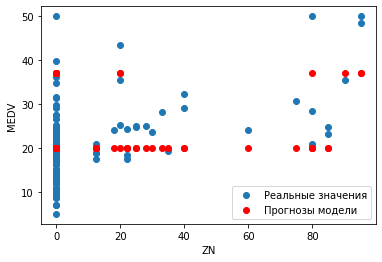

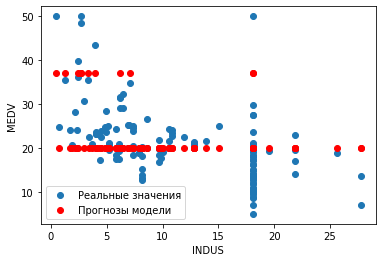

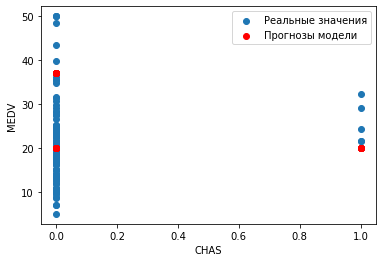

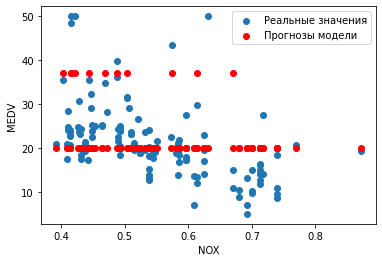

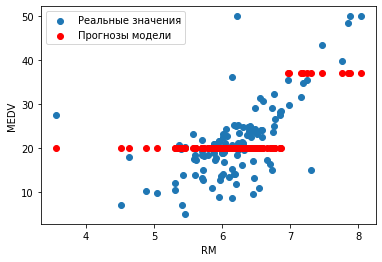

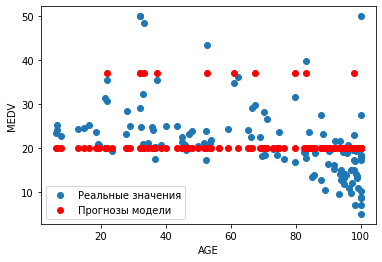

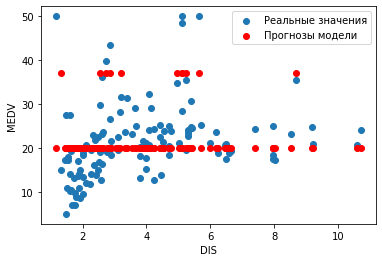

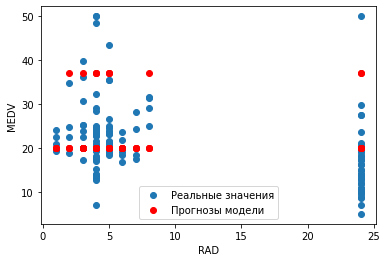

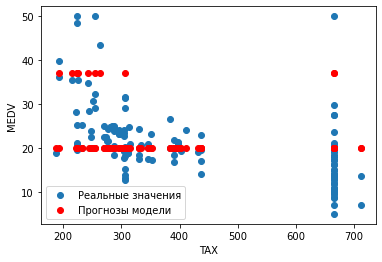

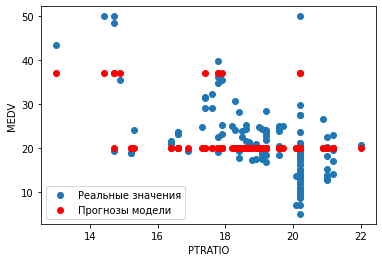

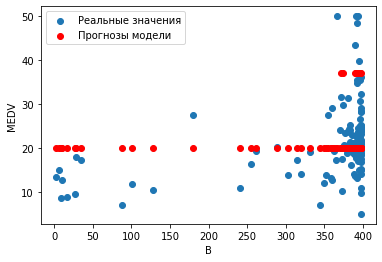

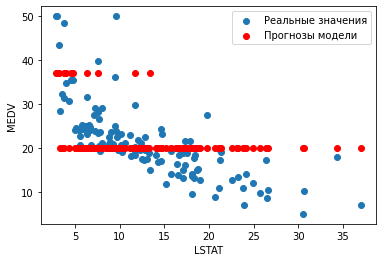

In [20]:
for column in x_test.columns:
    plt.scatter(x_test[column], y_test, label='Реальные значения')
    plt.scatter(x_test[column], y_pred, color='red', label='Прогнозы модели')
    plt.xlabel(column)
    plt.ylabel('MEDV')
    plt.legend()
    plt.show()

По графикам можем заметить, что наша модель регрессионного дерева решений *ооочень* плохо себя показывает. 

Оценивать ее метрики score нет никакого смысла. 

Причина такого качества модели очевидна: глубина дерева равна 1, оно ветвится единожды. Именно поэтому на каждом графике прогнозы нашей модели имеют только 2 различных значения, и наша модель не может нормально обобщить данные.

### Задание 2  (1 балл)


Продолжаем работать с датасетом boston

- С помощью `GridSearchCV` найдите оптимальные значения [`max_depth`, `min_samples_leaf`] используя кроссвалидацию с 5 фолдами
- Обучите модель с лучшими гиперпараметрами на всем тренировочном датасете
- Укажите значение `MAE` на тесте и значения гиперпараметров

* Найдем оптимальные значения гиперпараметров для модели дерева решений с помощью GridSearchCV используя кросс-валидацию с 5 фолдами

In [21]:
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, 13],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12]
}


tr = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(tr, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Лучшие гиперпараметры:", best_params)

Лучшие гиперпараметры: {'max_depth': 5, 'min_samples_leaf': 2}


* Обучим модель с оптимальными значениями гиперпараметров, и посмотрим на ее метрики

In [22]:
best_model = DecisionTreeRegressor(**best_params, random_state=42)
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

print("MAE на тестовом наборе:", mean_absolute_error(y_test, y_pred))
print("r-squared на тренировочном наборе:", best_model.score(x_train, y_train))
print("r-squared на тестовом наборе:", best_model.score(x_test, y_test))

MAE на тестовом наборе: 2.387755529018876
r-squared на тренировочном наборе: 0.9141593143696616
r-squared на тестовом наборе: 0.8358333769660674


Заметим, что на тренировочном наборе данных наша модель лучше обобщает результаты чем на тестовом, что может свидетельствовать о переобучении, однако *score* нашей модели на тестовом наборе данных все равно остается достаточно высоким. 

* Построим графики рассеяния для визуализации работы нашей модели.

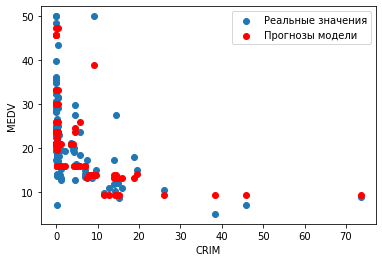

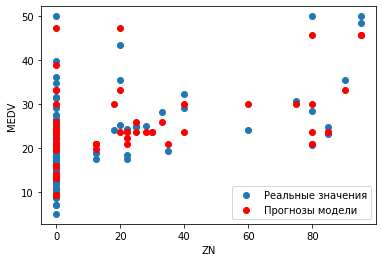

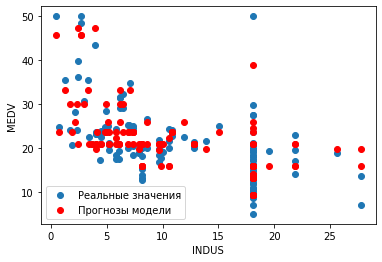

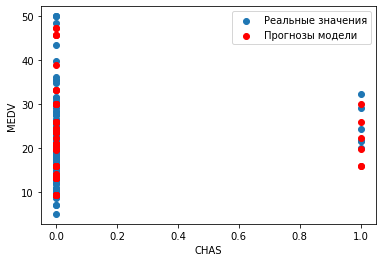

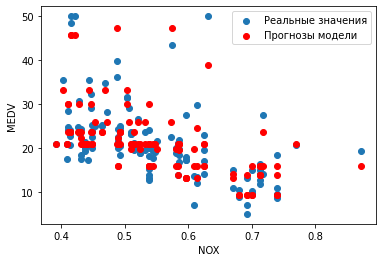

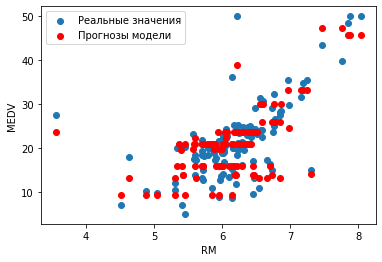

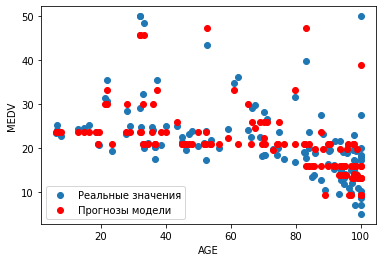

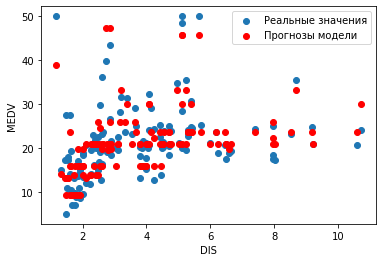

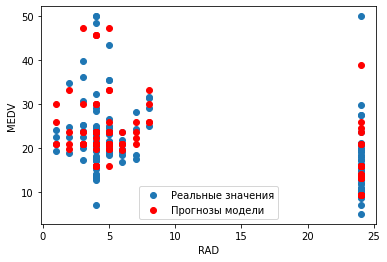

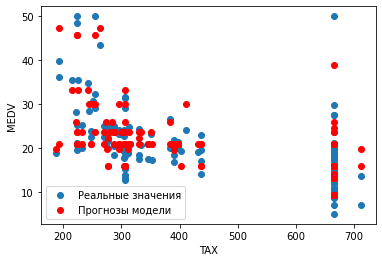

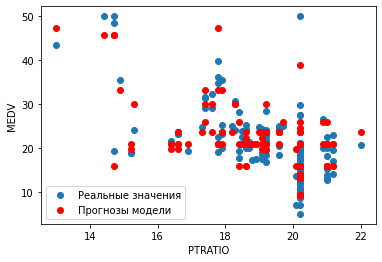

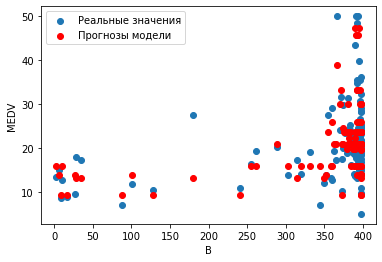

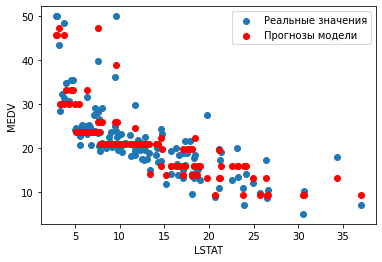

In [23]:
for column in x_test.columns:
    plt.scatter(x_test[column], y_test, label='Реальные значения')
    plt.scatter(x_test[column], y_pred, color='red', label='Прогнозы модели')
    plt.xlabel(column)
    plt.ylabel('MEDV')
    plt.legend()
    plt.show()

Невооруженным глазом видно, что данная модель справляется с прогнозированием целевой переменной намного лучше чем та, которую мы обучили в первом задании(параметр *depth = 1*), но и эта модель далека от совершенства, хотя в какой-то степени она действительно справляется со своей задачей.

### Задание 3  (1 балл)

Используйте `sklearn.ensemble.BaggingRegressor` для создания ансамбля 

- какого значение MAE на тесте удалось достичь
- как можно объяснить изменение результата в сравнении с отдельным деревом

* обучим ансамблевую модель BaggingRegressor, в качестве базового класса передав туда нашу модель DecisionTreeRegressor с подобранными гиперпараметрами

In [24]:
base_model = DecisionTreeRegressor(**best_params, random_state=42)

bagging_model = BaggingRegressor(base_model, n_estimators=100, random_state=42)
bagging_model.fit(x_train, y_train)

y_pred = bagging_model.predict(x_test)

print("MAE на тестовом наборе:", mean_absolute_error(y_test, y_pred))
print("r-squared на тренировочном наборе:", bagging_model.score(x_train, y_train))
print("r-squared на тестовом наборе:", bagging_model.score(x_test, y_test))

MAE на тестовом наборе: 2.343399878558652
r-squared на тренировочном наборе: 0.9313142096750657
r-squared на тестовом наборе: 0.8269571702890774


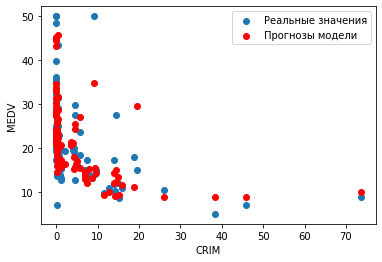

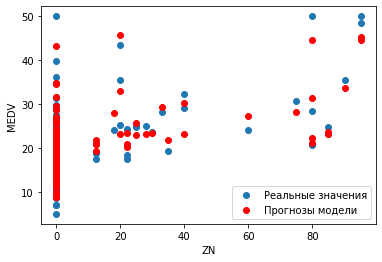

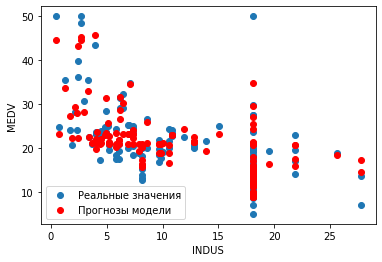

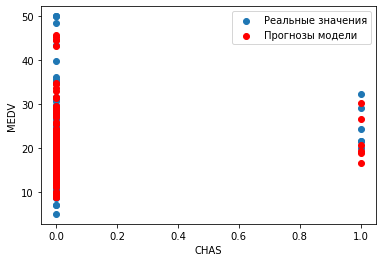

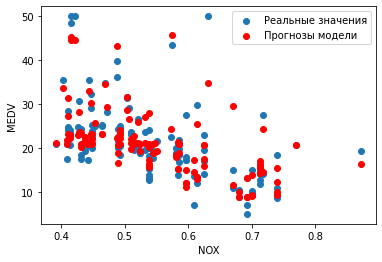

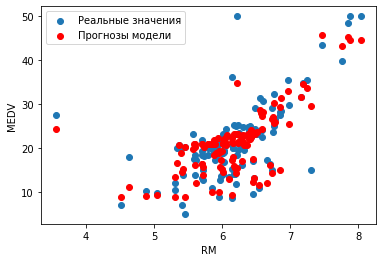

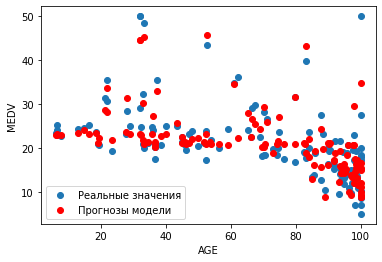

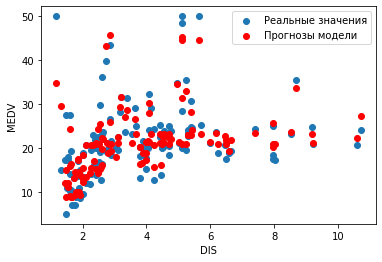

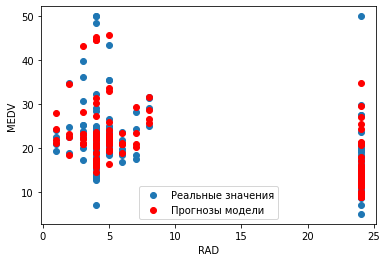

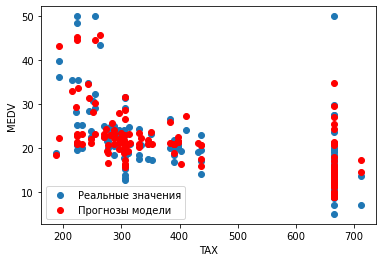

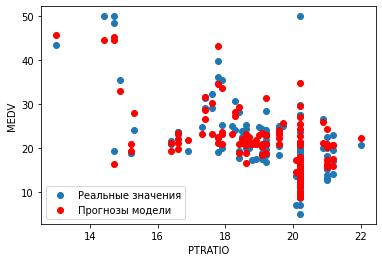

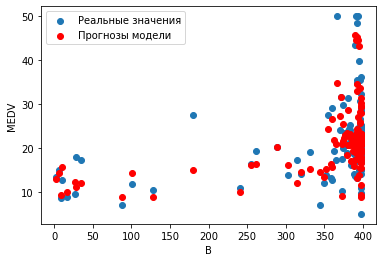

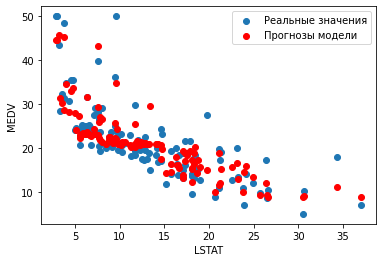

In [25]:
for column in x_test.columns:
    plt.scatter(x_test[column], y_test, label='Реальные значения')
    plt.scatter(x_test[column], y_pred, color='red', label='Прогнозы модели')
    plt.xlabel(column)
    plt.ylabel('MEDV')
    plt.legend()
    plt.show()

Ансамбль с использованием упаковщика (BaggingRegressor) обычно снижает дисперсию модели, что может привести к улучшению ее производительности на тестовом наборе по сравнению с отдельным деревом решений. Ансамбль объединяет несколько моделей, обученных на незначительно разных подмножествах данных, и их предсказания усредняются или агрегируются для получения окончательного предсказания. Это помогает снизить переобучение и повысить стабильность модели. В результате ансамбль может достичь более низкого значения MAE на тестовом наборе по сравнению с отдельным деревом решений. 

В нашем случае значения MAE действительно уменьшилось, но только на 0.04(с ~2.38 до ~2.34), что достаточно слабый результат. Но что намного важнее, тенденция к переобучению у модели бэггинга сохранилась, а это очень плохо. Разница между коэффициентами детерминации на тренировочной выборке и тестовой только возросла. С этим нужно что-то делать.

Рассмотрим следующие подходы:

* Уменьшение сложности базовой модели: например, уменьшение максимальной глубины  дерева (max_depth) или увеличение минимального количества образцов в листе (min_samples_leaf). Это поможет снизить сложность модели и возможно уменьшит ее склонность к переобучению.
* Увеличение размера ансамбля: увеличение количества базовых моделей в ансамбле может помочь улучшить обобщающую способность и снизить переобучение. Больший размер ансамбля повышает разнообразие предсказаний и способствует усреднению ошибок.
* Использование регуляризации: применение методов регуляризации к базовой модели, таких как min_samples_split, max_features или max_leaf_nodes. Регуляризация может помочь контролировать переобучение путем ограничения возможностей модели.

Воспользуемся методом **GridSearchCV**  еще раз для более точного подбора гиперпараметров модели базового класса для **BaggingRegressor**(в **param_grid** включим дополнительно такие параметры как **'min_samples_split'** и **'max_feauters'**)

In [26]:
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, 13],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 4, 6, 8, 10, 12],
    'max_features': [1, 2, 3, 4, 5]
}


tr = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(tr, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Лучшие гиперпараметры:", best_params)

Лучшие гиперпараметры: {'max_depth': 11, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 8}


Теперь применим **GridSearchCV** уже к модели **BaggingRegressor**, для подбора оптимального количества деревьев в ансамбле, передав в его базовый класс гиперпараметры, посчитанные в предыдущем шаге.

In [27]:
base_model = DecisionTreeRegressor(**best_params, random_state=42)

param_grid = {
    'n_estimators': [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300]
}

bagging_model = BaggingRegressor(base_model, random_state=42)
grid_search = GridSearchCV(bagging_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Лучшие гиперпараметры:", best_params)

Лучшие гиперпараметры: {'n_estimators': 80}


In [28]:
bagging_model = BaggingRegressor(base_model, n_estimators=80, random_state=42)
bagging_model.fit(x_train, y_train)

y_pred = bagging_model.predict(x_test)

print("MAE на тестовом наборе:", mean_absolute_error(y_test, y_pred))
print("r-squared на тренировочном наборе:", bagging_model.score(x_train, y_train))
print("r-squared на тестовом наборе:", bagging_model.score(x_test, y_test))

MAE на тестовом наборе: 2.066061747100836
r-squared на тренировочном наборе: 0.9420447939246512
r-squared на тестовом наборе: 0.8372825337419147


После более точной настройки моделей, мы получили MAE~2.06, против первоначального варианат ~2.38, что очень даже хорошо. Однако у нашей модели сохраняется некоторая тенденция к переобучению(разница между R^2 на train и R^2 на test ~0.1). Увеличение количества эстиматоров в модели бэггинга, а также различные ограничения модели базового класса дерева решений не приводят к значительному уменьшению разницы между коэффициентами детерминации на трейне и на тесте. Уменьшение глубины дерева, увеличение минимального количества образцов, требуемых для формирования листа дерева и повышение минимального количество образцов, требуемых для разделения узла в дереве действительно снижают тенденцию модели к переобучению(но незначительно), но вместе с тем и очень даже значительно снижают score модели, поэтому я могу сделать вывод, что добиться ЗНАЧИТЕЛЬНО лучшего результата, чем мы добились на наших данных используя бэггинг над деревьями регрессии, не представляется возможным.

*PS. чтобы не засорять ноутбук, я опустил изменения параметров базового класса вручную в попытках уменьшить переобучение модели, но при желании вы можете сами попробовать в ячейке подправить гиперпараметры и убедиться в том, что я написал выше.*

# Часть 2. Ансамбли

В этой части будем решать задачу классификации на датасете [Thyroid Disease Data Set](https://archive.ics.uci.edu/ml/datasets/thyroid+disease)

### Задание 1  (2 балла)

Начнем с предобработки данных 

0. Удалите столбцы, которые не являются полезными (например, много пропущенных значений). Объясните свой выбор. 
1. Разделите данные на тренировочную и тестовую части
2. Вы вероятно заметили, что имеются как категориальные так и численные признаки. С ними необходимо сделать следующее:
    -  Категориальные: Заполнить пропущенные значения и применить one-hot-encoding
    - Численные: Заполнить пропущенные значения

    
Используйте `ColumnTranformer` что бы задать общий "transformer" для всех столбцов в датасете. Он принимает на вход список кортежей

```
ColumnTransformer([
    ('name1', transform1, column_names1),
    ('name2', transform2, column_names2)
])
```

Обратите внимание на аргумент `remainder='passthrough'`. [Здесь](https://scikit-learn.org/stable/modules/compose.html#column-transformer) вы можете найти примеры использования `ColumnTranformer`. 
    
Поскольку мы хотим применить 2 преобразования к категориальному признаку, очень удобно объединить их в `Pipeline`:

```
double_tranform = make_pipeline(
                        transform_1,
                        transform_2
                        )
```

P.S. Выберите ваш любимый способ заполнения пропущенных значений. 

*Подсказка* Категориальный столбец обычно имеет `dtype = 'object'`. Это может помочь получить списки категориальных и числовых столбцов.

In [29]:
df = pd.read_csv("C:/Users/Egor/Desktop/jupyter/hse_ml_course/Datasets/thyroid_disease.csv")

In [30]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


Ниже в ячейке я укажу код для ColumnTranformer что бы задать общий "transformer" для всех столбцов в датасете, просто чтобы он был, но применять его я не буду, тк считаю, что при работе с нашими данными нужно провести более тщательный анализ для каждого столбца прежде чем принимать решение, чем мы его будем заполнять.

Начнем анализ столбцов датасета, чтобы понять, что нам удалять, что нам заменять, на что заменять и тд.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

Столбец **TBG** дропнем сразу, тк он полностью пустой.

In [32]:
df = df.drop(columns = ['TBG'])

In [33]:
nan_columns = []

for column in df.columns:
    if df[column].isna().any():
        nan_columns.append(column)

for column in nan_columns:
    nan_count = df[column].isna().sum()
    print(f"Столбец '{column}': {nan_count} NaN значений")

Столбец 'age': 1 NaN значений
Столбец 'sex': 150 NaN значений
Столбец 'TSH': 369 NaN значений
Столбец 'T3': 769 NaN значений
Столбец 'TT4': 231 NaN значений
Столбец 'T4U': 387 NaN значений
Столбец 'FTI': 385 NaN значений


### Столбец 'age'

In [34]:
nan_count = df['age'].isna().sum()
print(f"Столбец 'age': {nan_count} NaN значений")

Столбец 'age': 1 NaN значений


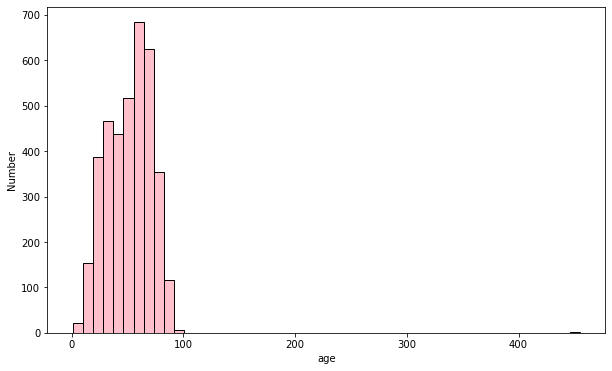

In [35]:
plt.figure(figsize=(10,6))
plt.hist(df['age'], bins=50, ec='black', color='pink')
plt.xlabel('age')
plt.ylabel('Number')
plt.show()

In [36]:
df['age'].value_counts()

59.0     95
60.0     91
70.0     90
73.0     81
55.0     81
         ..
10.0      1
4.0       1
5.0       1
455.0     1
6.0       1
Name: age, Length: 93, dtype: int64

У нас здесь какой-то странный выброс, что кому-то 455 лет. Удалим это значение, и заменим Nan значения на среднее арифметическое.

In [37]:
df['age'] = df['age'].replace(455, df['age'].mean())
df['age'] = df['age'].fillna(df['age'].mean())

In [38]:
print('Пропущенных значений в столбце:', df['age'].isna().sum())

Пропущенных значений в столбце: 0


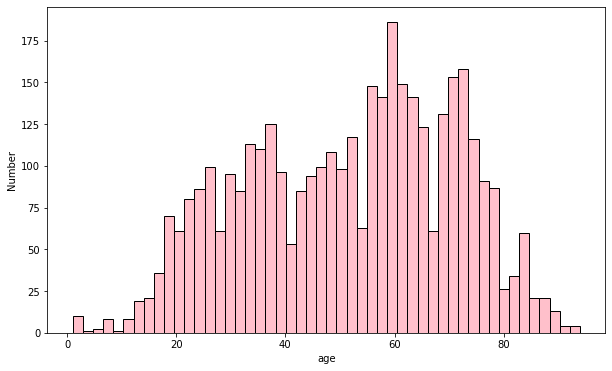

In [39]:
plt.figure(figsize=(10,6))
plt.hist(df['age'], bins=50, ec='black', color='pink')
plt.xlabel('age')
plt.ylabel('Number')
plt.show()

### Столбец 'sex'

In [40]:
nan_count = df['sex'].isna().sum()
print(f"Столбец 'sex': {nan_count} NaN значений")

Столбец 'sex': 150 NaN значений


In [41]:
print(df["sex"].value_counts())

F    2480
M    1142
Name: sex, dtype: int64


Обратим внимание, что классы несбалансированы.

Из-за того, что в данных наблюдается явное доминирование одного класса над другим, я предпочту заменить отсутствующие значения в столбце(благо их не так много в процентном соотношении, всего 150) на 'F'. Если бы классы были сбалансированы, я бы заменял пропущенные значения с помощью генератора случайных значений(на 'M' или 'F')

In [42]:
df['sex'] = df['sex'].fillna('F')

In [43]:
print(df["sex"].value_counts())
print('Пропущенных значений в столбце:', df['sex'].isna().sum())

F    2630
M    1142
Name: sex, dtype: int64
Пропущенных значений в столбце: 0


### Столбец 'TSH'

Столбец **TSH** отвечает за уровень гормона щитовидной железы TSH (тиреотропный гормон), измеренный в крови пациента. TSH является гормоном, вырабатываемым гипофизом, который регулирует функцию щитовидной железы. Высокий уровень TSH обычно указывает на гипотиреоз (недостаточную функцию щитовидной железы), в то время как низкий уровень TSH может указывать на гипертиреоз (чрезмерную функцию щитовидной железы). В датасете значение столбца **TSH** может быть числовым или NaN (отсутствующим значением), в зависимости от наличия или отсутствия измерения у пациента.

In [44]:
nan_count = df['TSH'].isna().sum()
print(f"Столбец 'TSH': {nan_count} NaN значений")

Столбец 'TSH': 369 NaN значений


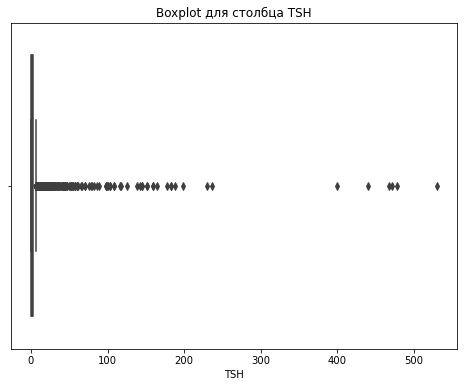

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TSH'])
plt.xlabel('TSH')
plt.title('Boxplot для столбца TSH')
plt.show()

В столбце много экстремальных значений. Скорее всего это люди с гипотериозом щитовидной железы. Важно обратить внимания, что все экстремальные значения отвечают за высокий уровень TSH, экстремальных значений слева просто нету.

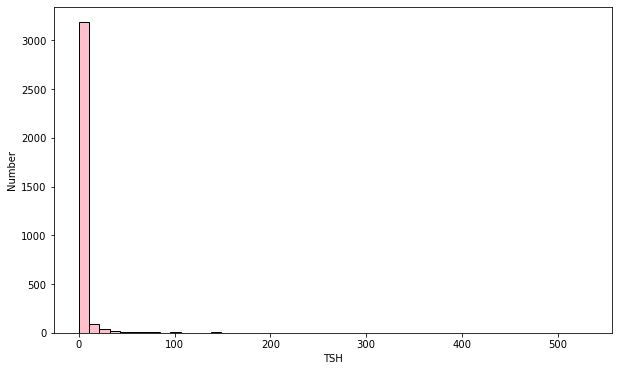

In [46]:
plt.figure(figsize=(10,6))
plt.hist(df['TSH'], bins=50, ec='black', color='pink')
plt.xlabel('TSH')
plt.ylabel('Number')
plt.show()

Я не знаю как при работе с такими данными мы можем заменять пропущенные значения на "типичное наблюдение", ведь это потенциально могут быть люди с гипотериозом щитовидной железы, однако если мы пропущенные значения заменим на например медианное значение, то этот параметр будет их характеризовать как здоровых. 

Поэтому все пропущенные значения для пациентов, у которых **Class** *negative*, я заменю на медианное значение **TSH**. 

Для всех пациентов, у которых **Class** *sick*, я заменю пропущенные значния **TSH** на среднее значение **TSH** среди больных пациентов.

In [47]:
median_tsh_negative = df.loc[df['Class'] == 'negative', 'TSH'].median()
mean_tsh_sick = df.loc[df['Class'] == 'sick', 'TSH'].mean()

df.loc[(df['Class'] == 'negative') & (df['TSH'].isnull()), 'TSH'] = median_tsh_negative
df.loc[(df['Class'] == 'sick') & (df['TSH'].isnull()), 'TSH'] = mean_tsh_sick

In [48]:
print('Пропущенных значений в столбце:', df['TSH'].isna().sum())

Пропущенных значений в столбце: 0


### Столбец 'T3'

Cтолбец **Т3** отвечает за уровень гормона трехйодтиронина (T3) в плазме крови. Трехйодтиронин - это один из главных гормонов, вырабатываемых щитовидной железой, и он играет важную роль в регуляции обмена веществ в организме. Уровень T3 может быть использован для диагностики и оценки функции щитовидной железы, так как изменения в его концентрации могут указывать на различные нарушения, включая гипертиреоз (повышенная функция щитовидной железы) или гипотиреоз (пониженная функция щитовидной железы).

In [49]:
nan_count = df['T3'].isna().sum()
print(f"Столбец 'T3': {nan_count} NaN значений")

Столбец 'T3': 769 NaN значений


In [50]:
df['T3'].isna().sum()/len(df['T3'])

0.20387062566277836

В данном столбце пропущено порядка пятой части всех значений, что на самом деле очень грустно(достаточно много пропущенных значений). Если бы данные в этом столбце были категоральные, я бы вероятно просто его дропнул.

Тк данные количественные, мы можем попробовать что-нибудь придумать. Давайте поближе взгялнем на данные.

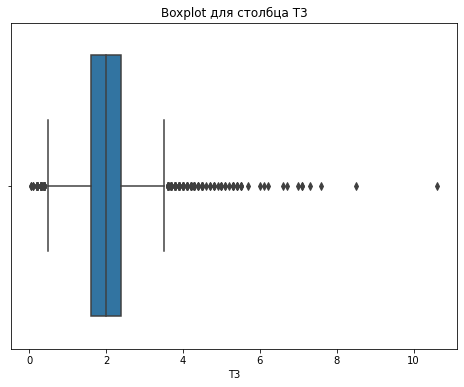

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['T3'])
plt.xlabel('T3')
plt.title('Boxplot для столбца T3')
plt.show()

***Гистограмма по всей выборке***

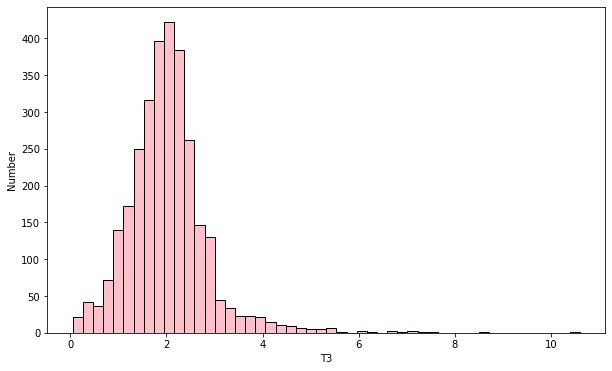

In [52]:
plt.figure(figsize=(10,6))
plt.hist(df['T3'], bins=50, ec='black', color='pink')
plt.xlabel('T3')
plt.ylabel('Number')
plt.show()

***Гистограмма по выборке больных***

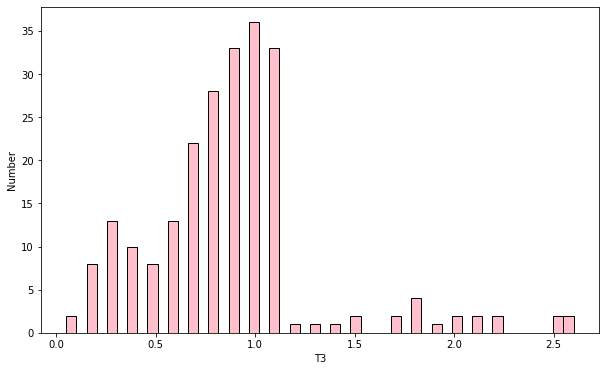

In [53]:
plt.figure(figsize=(10,6))
plt.hist(df.loc[df['Class'] == 'sick', 'T3'], bins=50, ec='black', color='pink')
plt.xlabel('T3')
plt.ylabel('Number')
plt.show()

Судя по всему нам повезло(как я это вижу) 

* Во первых у нас не так много экстремальных значений в данном столбце
* Во вторых подавляющее большинство экстремальных значений лежит правее медианы
* В третьих распределение наших данных похоже на нормальное, и оно не имеет явновыраженного смещения(extremas справа не в счет - это или несколько выбросов, или пациенты выбивающиеся из общей клинической картины с какими-то очень серьезными отклонениями) 
* В четвертых, большинство больных пациентов имеют пониженный уровень T3 в крови(выбросы T3 справа - это в большей степени здоровые в рамках работоспособности щитовидной железы люди) 

На основании вышесказанного, я заменю пропущенные значения T3 для здоровых пациентов на среднее значение по всей выборке, и пропущенные значения для больных пациентов на медиану по выборке больных. Мне кажется это не должно значительно исказить наши данные. 

In [54]:
print("Пропущенные значения для класса 'negative':", df[df['Class'] == 'negative']['T3'].isnull().sum())
print("Пропущенные значения для класса 'sick':", df[df['Class'] == 'sick']['T3'].isnull().sum())

Пропущенные значения для класса 'negative': 766
Пропущенные значения для класса 'sick': 3


Чуть не забыл проверить одну очень важную вещь. Количество пропущенных значений в столбце **T3** по классу целевой переменной. Все таки ситуация оказалось печальной. В этом столбец всего 3 пропущенных значений для больных пациентов, и 766 для здоровых. Это значит, что если мы для здоровых пациентов заменим пропущенные значения на медианное, то в распределении наших данных получится громадный пик, на уровне медианы, что сильно исказит наше прекрасное, "почти-нормальное" распределение. Поэтому придется поменять стратегию. Будем заполнять отсутствующие значения T3 для здоровых пациентов генерируя рандомные данные, подчиняющиеся нормальному распределению на основании медианы и стандартного отклонения, установив границу снизу равную 0 с помощью *numpy*.

In [55]:
# Для больных
df.loc[(df['Class'] == 'sick') & (df['T3'].isnull()), 'T3'] = df.loc[df['Class'] == 'sick', 'T3'].median()

# Для здоровых
median = df['T3'].median()
std = df['T3'].std()
missing_values = df['T3'].isnull().sum()

np.random.seed(42)

random_values = np.random.normal(median, std, missing_values)
random_values = np.clip(random_values, 0, None)

df.loc[df['T3'].isnull(), 'T3'] = random_values

***Гитограмма T3 для оценки данных после заполнения пустых значений.***

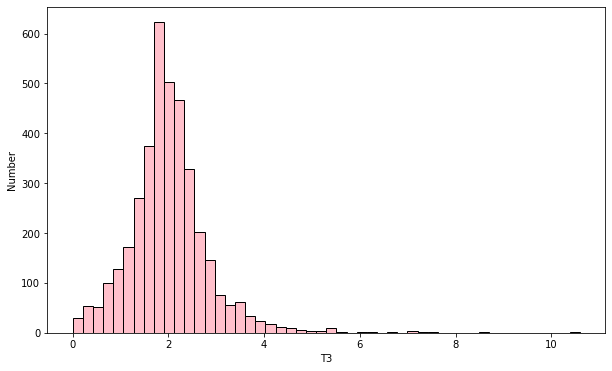

In [56]:
plt.figure(figsize=(10,6))
plt.hist(df['T3'], bins=50, ec='black', color='pink')
plt.xlabel('T3')
plt.ylabel('Number')
plt.show()

В целом вроде бы получился неплохой результат, учитывая то, что мы заполнили порядка 20% отсутствующих значений в столбце.

In [57]:
print('Пропущенных значений в столбце:', df['T3'].isna().sum())

Пропущенных значений в столбце: 0


### Столбец 'TT4'

Cтолбец **TT4** отвечает за уровень тироксина (T4) в сыворотке пациента. Тироксин - это один из гормонов, вырабатываемых щитовидной железой. Он играет важную роль в регуляции обмена веществ и энергетического обмена в организме. Измерение уровня T4 в сыворотке крови является важным показателем при диагностике заболеваний щитовидной железы, таких как гипотиреоз или гипертиреоз.

In [58]:
nan_count = df['TT4'].isna().sum()
print(f"Столбец 'TT4': {nan_count} NaN значений")

Столбец 'TT4': 231 NaN значений


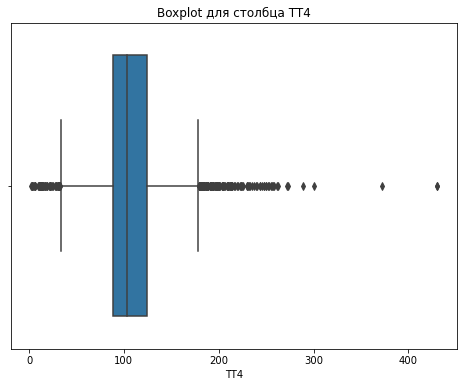

In [59]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TT4'])
plt.xlabel('TT4')
plt.title('Boxplot для столбца TT4')
plt.show()

***Гистограмма по выборке больных***

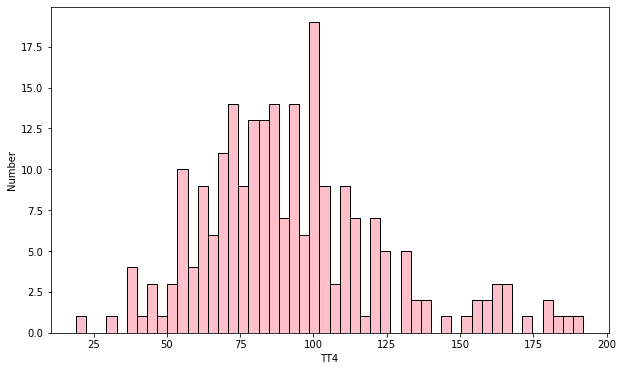

In [60]:
plt.figure(figsize=(10,6))
plt.hist(df.loc[df['Class'] == 'sick', 'TT4'], bins=50, ec='black', color='pink')
plt.xlabel('TT4')
plt.ylabel('Number')
plt.show()

***Гистограмма по выборке здоровых***

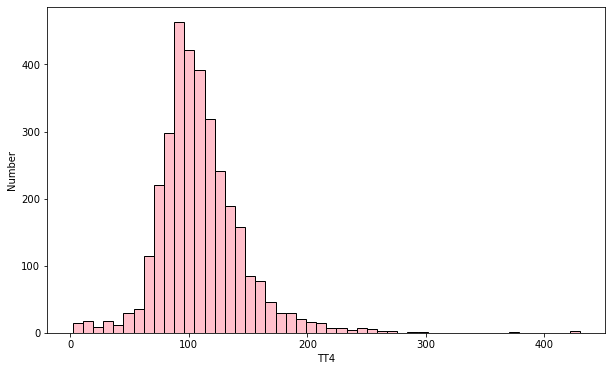

In [61]:
plt.figure(figsize=(10,6))
plt.hist(df.loc[df['Class'] == 'negative', 'TT4'], bins=50, ec='black', color='pink')
plt.xlabel('TT4')
plt.ylabel('Number')
plt.show()

Исходя из гистограмм, можем заметить, что и среди больных, и среди здоровых людей, большинство имеют значение TT4 в интервале от ~50 до ~150. В этом плане принципиального различия между больными и здоровыми пациентами на наших данных нету, что довольно интересно. Можно выдвинуть предположение о том, что этот столбец имеет незначительное влияние на целевую переменную. Но сейчас о другом. Наши данные не имеют ярко выраженного смещения, попробуем заменить пропущенные значения по тому же принципу, что мы применяли для столбца **T3**

***Гистограмма по всей выборке***

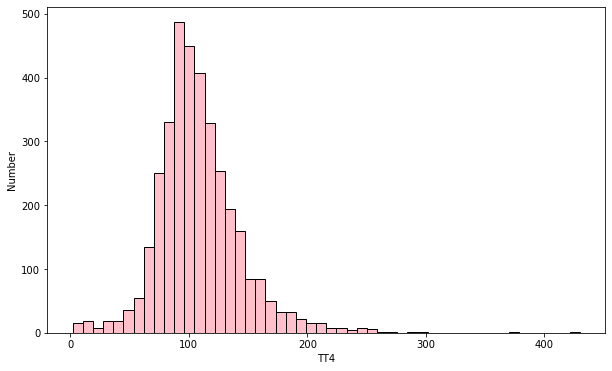

In [62]:
plt.figure(figsize=(10,6))
plt.hist(df['TT4'], bins=50, ec='black', color='pink')
plt.xlabel('TT4')
plt.ylabel('Number')
plt.show()

In [63]:
median = df['TT4'].median()
std = df['TT4'].std()
missing_values = df['TT4'].isnull().sum()

np.random.seed(42)

random_values = np.random.normal(median, std, missing_values)
random_values = np.clip(random_values, 0, None)

df.loc[df['TT4'].isnull(), 'TT4'] = random_values

***Гитограмма TT4 для оценки данных после заполнения пустых значений.***

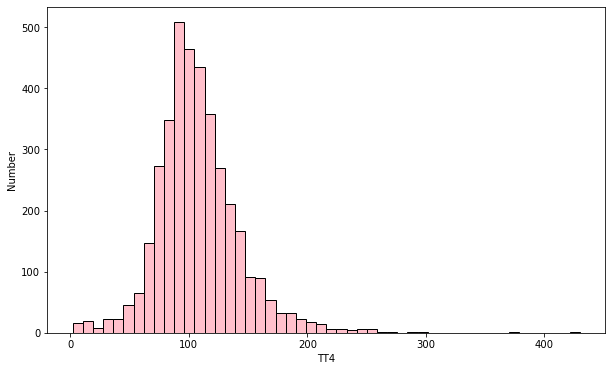

In [64]:
plt.figure(figsize=(10,6))
plt.hist(df['TT4'], bins=50, ec='black', color='pink')
plt.xlabel('TT4')
plt.ylabel('Number')
plt.show()

Получился очень даже хороший результат.

In [65]:
print('Пропущенных значений в столбце:', df['TT4'].isna().sum())

Пропущенных значений в столбце: 0


### Столбец 'T4U'

Столбец **T4U** отвечает за уровень свободного тироксина (Free T4) в сыворотке пациента, который связан с белком, известным как тироксин-связывающий глобулин (T4-binding globulin).

Измерение уровня свободного тироксина является важным показателем при диагностике заболеваний щитовидной железы, таких как гипотиреоз или гипертиреоз. 

In [66]:
nan_count = df['T4U'].isna().sum()
print(f"Столбец 'T4U': {nan_count} NaN значений")

Столбец 'T4U': 387 NaN значений


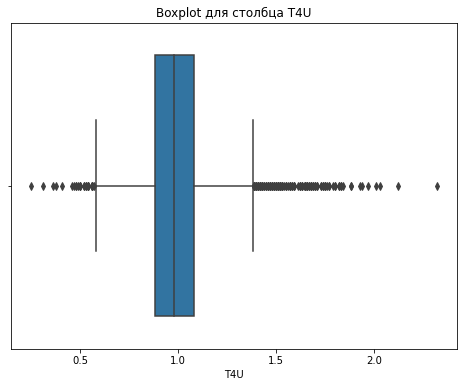

In [67]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['T4U'])
plt.xlabel('T4U')
plt.title('Boxplot для столбца T4U')
plt.show()

***Гистограмма по выборке больных***

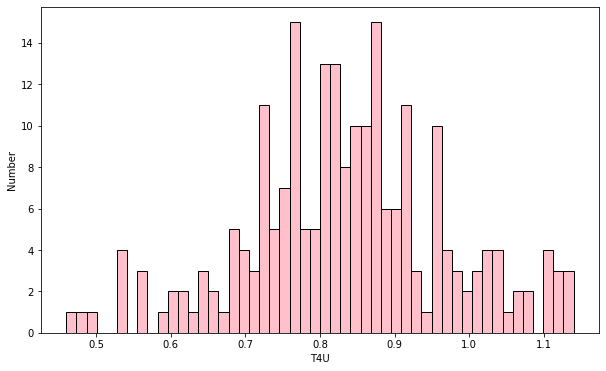

In [68]:
plt.figure(figsize=(10,6))
plt.hist(df.loc[df['Class'] == 'sick', 'T4U'], bins=50, ec='black', color='pink')
plt.xlabel('T4U')
plt.ylabel('Number')
plt.show()

***Гистограмма по выборке здоровых***

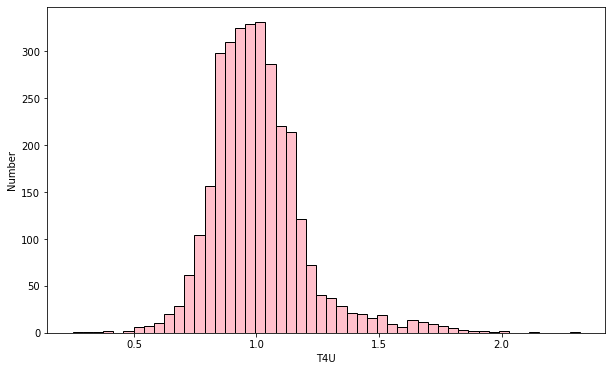

In [69]:
plt.figure(figsize=(10,6))
plt.hist(df.loc[df['Class'] == 'negative', 'T4U'], bins=50, ec='black', color='pink')
plt.xlabel('T4U')
plt.ylabel('Number')
plt.show()

***Гистограмма по всей выборке***

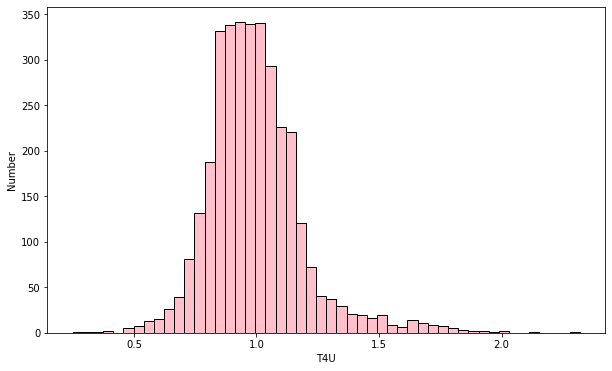

In [70]:
plt.figure(figsize=(10,6))
plt.hist(df['T4U'], bins=50, ec='black', color='pink')
plt.xlabel('T4U')
plt.ylabel('Number')
plt.show()

Исходя из гистограмм можем заметить следующее:

* большинство больных пациентов имеют уровень T4U в крови лежащий в интервале от ~0.7 до ~0.9
* большинство здоровых пациентов имеют уровень T4U в крови лежащий в интервале от ~0.7 до ~1.25

В среднем для здоровых людей нормальным считается более выскоий уровень T4U в крови по сравнению с больными.


Посмотрим сколько у нас пропущенных значений по каждому классу целевой переменной:

In [71]:
print("Пропущенные значения для класса 'negative':", df[df['Class'] == 'negative']['T4U'].isnull().sum())
print("Пропущенные значения для класса 'sick':", df[df['Class'] == 'sick']['T4U'].isnull().sum())

Пропущенные значения для класса 'negative': 379
Пропущенные значения для класса 'sick': 8


Воспользуемся уже описанным выше методом для заполнения пропущенных значений, только в этот раз применим его отдельно для больных и для сдоровых, так как некая разница для этих двух классов по данному столбцу все таки присутствует.

In [72]:
median = df[df['Class'] == 'negative']['T4U'].median()
std = df[df['Class'] == 'negative']['T4U'].std()
missing_values = df[df['Class'] == 'negative']['T4U'].isnull().sum()

np.random.seed(42)

random_values = np.random.normal(median, std, missing_values)
random_values = np.clip(random_values, 0, None)

df.loc[(df['Class'] == 'negative') & (df['T4U'].isnull()), 'T4U'] = random_values

In [73]:
median = df[df['Class'] == 'sick']['T4U'].median()
std = df[df['Class'] == 'sick']['T4U'].std()
missing_values = df[df['Class'] == 'sick']['T4U'].isnull().sum()

np.random.seed(42)

random_values = np.random.normal(median, std, missing_values)
random_values = np.clip(random_values, 0, None)

df.loc[(df['Class'] == 'sick') & (df['T4U'].isnull()), 'T4U'] = random_values

In [74]:
print('Пропущенных значений в столбце:', df['T4U'].isna().sum())

Пропущенных значений в столбце: 0


### Столбец 'FTI'

Столбец **FTI** (Free Thyroxine Index) отвечает за свободный тироксиновый индекс. FTI представляет собой расчетный показатель, который вычисляется как отношение уровня свободного тироксина (Free T4) к уровню тиреоид-связывающего индекса (T4-binding index).

FTI используется для оценки функции щитовидной железы и диагностики различных форм тиреоидных заболеваний. Измерение FTI позволяет оценить, насколько активно щитовидная железа вырабатывает и высвобождает тироксин в организме.

In [75]:
nan_count = df['FTI'].isna().sum()
print(f"Столбец 'FTI': {nan_count} NaN значений")

Столбец 'FTI': 385 NaN значений


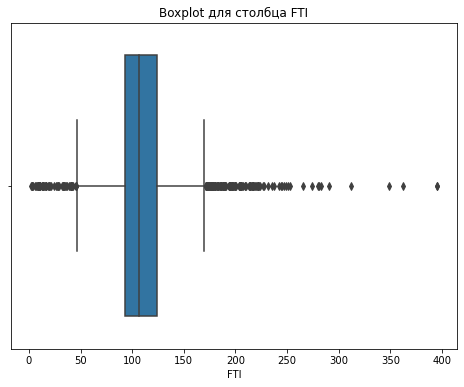

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['FTI'])
plt.xlabel('FTI')
plt.title('Boxplot для столбца FTI')
plt.show()

***Гистограмма по выборке больных***

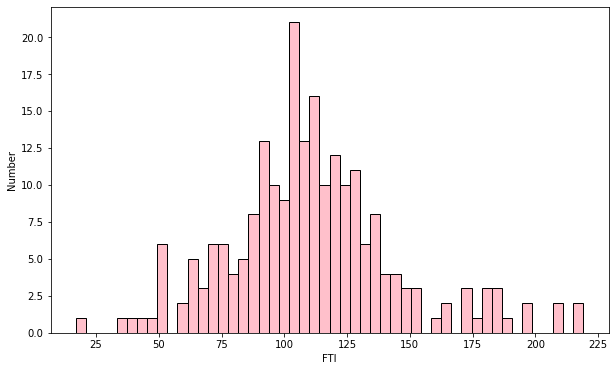

In [77]:
plt.figure(figsize=(10,6))
plt.hist(df.loc[df['Class'] == 'sick', 'FTI'], bins=50, ec='black', color='pink')
plt.xlabel('FTI')
plt.ylabel('Number')
plt.show()

***Гистограмма по выборке здоровых***

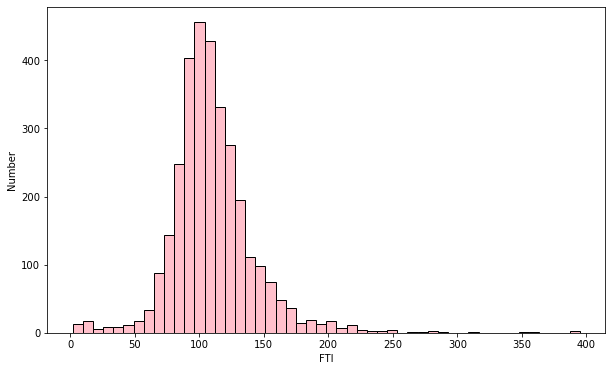

In [78]:
plt.figure(figsize=(10,6))
plt.hist(df.loc[df['Class'] == 'negative', 'FTI'], bins=50, ec='black', color='pink')
plt.xlabel('FTI')
plt.ylabel('Number')
plt.show()

***Гистограмма по всей выборке***

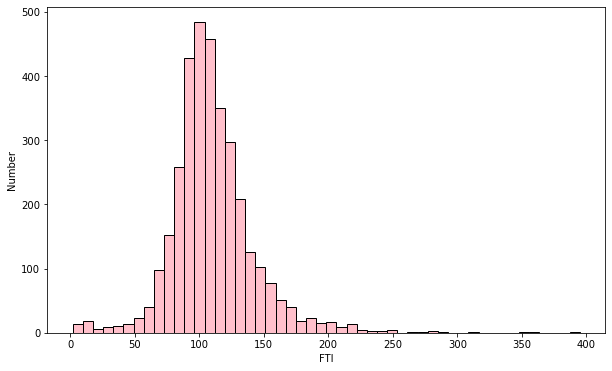

In [79]:
plt.figure(figsize=(10,6))
plt.hist(df['FTI'], bins=50, ec='black', color='pink')
plt.xlabel('FTI')
plt.ylabel('Number')
plt.show()

Исходя из гистограмм, можем заметить, что и среди больных, и среди здоровых людей, большинство имеют значение FTI в интервале от ~50 до ~150. Наши данные не имеют ярко выраженного смещения, поэтому заменим пропущенные значения по тому же принципу, что мы применяли для столбца T3

In [80]:
median = df['FTI'].median()
std = df['FTI'].std()
missing_values = df['FTI'].isnull().sum()

np.random.seed(42)

random_values = np.random.normal(median, std, missing_values)
random_values = np.clip(random_values, 0, None)

df.loc[df['FTI'].isnull(), 'FTI'] = random_values

In [81]:
print('Пропущенных значений в столбце:', df['FTI'].isna().sum())

Пропущенных значений в столбце: 0


Убедимся, что в нашем датасете не осталось столбцов с Nan значениями:

In [82]:
print('Количество Nan значений в каждом из столбцов: \n')
print(df.isna().sum())

Количество Nan значений в каждом из столбцов: 

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
referral_source              0
Class                        0
dtype: int64


In [83]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,2.500000,t,125.0,t,1.140000,t,109.000000,f,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,2.000000,t,102.0,f,1.086424,f,123.436121,f,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,2.411164,t,109.0,t,0.910000,t,120.000000,f,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,1.900000,t,175.0,f,0.963160,f,102.424876,f,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,1.200000,t,61.0,t,0.870000,t,70.000000,f,SVI,negative


### Encoding категоральных столбцов

Взглянем на количество уникальных значений в каждом категоральном столбце:

In [84]:
categorical_columns = df.select_dtypes(include='object').columns
print(df[categorical_columns].nunique())

sex                          2
on_thyroxine                 2
query_on_thyroxine           2
on_antithyroid_medication    2
sick                         2
pregnant                     2
thyroid_surgery              2
I131_treatment               2
query_hypothyroid            2
query_hyperthyroid           2
lithium                      2
goitre                       2
tumor                        2
hypopituitary                2
psych                        2
TSH_measured                 2
T3_measured                  2
TT4_measured                 2
T4U_measured                 2
FTI_measured                 2
TBG_measured                 1
referral_source              5
Class                        2
dtype: int64


1. Дропнем столбец **TBG_measured**, тк это категоральный столбец, который имеет только одно уникальное значение. Он не дает нам никакой информации.

2. Столбец **referral_source** закодируем с помощью LabelEncoder, а не OneHotEncoder, тк этот столбец имеет 5 уникальных значений и при One-hot энкодинге, у нас из него получится 5 столбцов. В такой ситуации предпочтительнее использовать LabelEncoder.

3. Столбец **Class** тоже закодируем с помощью LabelEncoder, тк это целевая переменная.

4. Остальные категоральные столбцы в датасете имеют по 2 уникальных значения. Закодируем их с помощью OneHotEncoder.

In [85]:
# Drop TBG_measured
df = df.drop(columns = ['TBG_measured'])

# LabelEncoding refferal_source
lb_encoder = LabelEncoder()
df['referral_source'] = lb_encoder.fit_transform(df['referral_source'])
df['Class'] = lb_encoder.fit_transform(df['Class'])

####
# Уберем из списка категоральных столбцов refferal_source и Class
categorical_columns = categorical_columns.drop('referral_source')
categorical_columns = categorical_columns.drop('Class')
categorical_columns = categorical_columns.drop('TBG_measured')

oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

encoded_features = oh_encoder.fit_transform(df[categorical_columns])

df = df.drop(categorical_columns, axis=1)
df[oh_encoder.get_feature_names_out(categorical_columns)] = encoded_features

In [86]:
display(df.head())
display(df.info())

,age,TSH,T3,TT4,T4U,FTI,referral_source,Class,sex_F,sex_M,...,TSH_measured_f,TSH_measured_t,T3_measured_f,T3_measured_t,TT4_measured_f,TT4_measured_t,T4U_measured_f,T4U_measured_t,FTI_measured_f,FTI_measured_t
0,41.0,1.30,2.500000,125.0,1.140000,109.000000,1,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,23.0,4.10,2.000000,102.0,1.086424,123.436121,4,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,46.0,0.98,2.411164,109.0,0.910000,120.000000,4,0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,70.0,0.16,1.900000,175.0,0.963160,102.424876,4,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,70.0,0.72,1.200000,61.0,0.870000,70.000000,3,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          3772 non-null   float64
 1   TSH                          3772 non-null   float64
 2   T3                           3772 non-null   float64
 3   TT4                          3772 non-null   float64
 4   T4U                          3772 non-null   float64
 5   FTI                          3772 non-null   float64
 6   referral_source              3772 non-null   int32  
 7   Class                        3772 non-null   int32  
 8   sex_F                        3772 non-null   float64
 9   sex_M                        3772 non-null   float64
 10  on_thyroxine_f               3772 non-null   float64
 11  on_thyroxine_t               3772 non-null   float64
 12  query_on_thyroxine_f         3772 non-null   float64
 13  query_on_thyroxine

None

Теперь наши данные наконец-то готовы, обработаны, и мы можем приступить к дальнейшей работе с ними.

### Задание 2  (1.5 балл)

Обучите и сравните 5 разных моделей из sklearn: Gradient Boosting, Random Forest, Decision Tree, SVM, Logitics Regression
    
* Выберите одну метрику классификации и обоснуйте свой выбор.
* Сравните модели используя данную метрику на кроссвалидации. Не забудьте выбрать верную стратегию кроссвалидации с учетом баланса классов. (подробнее о CV стратегиях [тут](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold))
* Какая модель оказалась лучшей. Какие модели переобучались или недообучались?

Во первых проверим классы целевой переменной на сбалансированность:

In [87]:
df['Class'].value_counts()

0    3541
1     231
Name: Class, dtype: int64

Классы несбалансированы. 
На 3541 наблюдение класса "0"(здоровый пациент), мы имеем 231 наблюдение класса "1"(больной пациент).


Это не очень хорошо.


При обучении модели для решения задачи классификации мы должны стараться сохранять баланс между классами данных. 
Поэтому при обучении моделей в качестве стратегии кросс-валидации я **однозначно** выберу ***Stratified K-fold Cross-Validation***

* *Stratified K-fold Cross-Validation* (стратифицированная кросс-валидация с использованием K блоков): Этот метод также разбивает данные на K блоков, но сохраняет баланс классов в каждом блоке. Это особенно полезно в случае, когда у вас есть несбалансированные классы.

Кроме того, в качестве метрики оценки качества модели классификации я также **однозначно** выберу **recall**, так как для нас важно, чтобы модель находила как можно больше правильных положительных случаев и по возможности минимизировала количество ложноотрицательных результатов. Лучше мы отправим здорового человека на обследование, чем не отправим на обследование больного человека.

In [88]:
y = df['Class']
x = df.drop('Class', axis=1)

In [89]:
# Скейлер
scaler = StandardScaler()

# Создание объекта Stratified K-fold Cross-Validation с 5 фолдами
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Модель GradientBoosting

In [90]:
model = GradientBoostingClassifier()

recall_scores_train = []
recall_scores_test = []

for train_index, test_index in kfold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    recall_scores_train.append(recall_train)
    recall_scores_test.append(recall_test)

print("Средний recall на train: {:.5f}".format(np.mean(recall_scores_train)))
print("Средний recall на test: {:.5f}".format(np.mean(recall_scores_test)))

Средний recall на train: 0.98485
Средний recall на test: 0.83987


### Модель RandomForest

In [91]:
model = RandomForestClassifier()

recall_scores_train = []
recall_scores_test = []

for train_index, test_index in kfold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    recall_scores_train.append(recall_train)
    recall_scores_test.append(recall_test)

print("Средний recall на train: {:.5f}".format(np.mean(recall_scores_train)))
print("Средний recall на test: {:.5f}".format(np.mean(recall_scores_test)))

Средний recall на train: 1.00000
Средний recall на test: 0.80093


### Модель DecisionTreeClassifier

In [92]:
model = DecisionTreeClassifier()

recall_scores_train = []
recall_scores_test = []

for train_index, test_index in kfold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    recall_scores_train.append(recall_train)
    recall_scores_test.append(recall_test)

print("Средний recall на train: {:.5f}".format(np.mean(recall_scores_train)))
print("Средний recall на test: {:.5f}".format(np.mean(recall_scores_test)))

Средний recall на train: 1.00000
Средний recall на test: 0.89639


### Модель SVM

In [93]:
model = SVC()

recall_scores_train = []
recall_scores_test = []

for train_index, test_index in kfold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    recall_scores_train.append(recall_train)
    recall_scores_test.append(recall_test)

print("Средний recall на train: {:.5f}".format(np.mean(recall_scores_train)))
print("Средний recall на test: {:.5f}".format(np.mean(recall_scores_test)))

Средний recall на train: 0.34739
Средний recall на test: 0.28548


### Модель LogisticRegression

In [94]:
model = LogisticRegression()

recall_scores_train = []
recall_scores_test = []

for train_index, test_index in kfold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    recall_scores_train.append(recall_train)
    recall_scores_test.append(recall_test)

print("Средний recall на train: {:.5f}".format(np.mean(recall_scores_train)))
print("Средний recall на test: {:.5f}".format(np.mean(recall_scores_test)))

Средний recall на train: 0.59198
Средний recall на test: 0.56679


На основании полученных данных можем сделать следующие выводы:

* Переобучились модели GradientBoosting, RandomForest и TreeClassifier. Скорее всего это вызвано следующими причинами:
    * Недостаточное количество данных: не очень большое количество данных, на которых обучаются модели, может вызвать  риск переобучения. Модели с большим количеством параметров, такие как GradientBoosting и RandomForest, могут легко запомнить малое количество обучающих примеров и показывать совсем не такую хоршую обобщающую способность на новых данных, как на тренировочных.
    * Слишком сложные модели: GradientBoosting, RandomForest и DecisionTreeClassifier могут создавать сложные модели, которые могут легко запомнить шум в данных или детали, специфичные для обучающего набора. Это может привести к переобучению, когда модель не способна обобщить паттерны на новых данных.   
    * Неправильная настройка гиперпараметров: Гиперпараметры моделей, такие как глубина деревьев, количество деревьев или скорость обучения (learning rate), должны быть настроены оптимально. Если гиперпараметры не настроены правильно, модель может переобучиться(здесь важно отметить, что мы не проводили оптимизацию гиперпараметров для данных моделей)
* Недообучились модели LogisticRegression и в значительной степени SVM(SVC). Скорее всего это произошло по следующей причине:
    * Несбалансированные данные: в тренировочном наборе данных присутствовал довольно сильный дисбаланс классов, а такие модели как LogisticRegression и SVC могут склоняться к предсказанию доминирующего класса, игнорируя менее представленный класс. Это в нашем случае и могло привести к недообучению для меньшего класса(отдельно стоить обратить внимание, что в качестве метрики оценки мы использовали recall) Если проблема недообучения действительно вызвана несбалансированностью данных в тренировочной выборке, стоит ожидать низкого значения метрики recall, что мы в принципе и увидели.

Отдельно хочется сказать о моделях RandomForest и TreeClassifier.

Несмотря на то, что они показали recall на train равный или почти равный единице, что может говорить об их переобучении, нельзя также закрывать глаза и на их высокий recall на test(важно то, что recall на test брался как среднее значение по recall при обучении моделей используя кросс-валидацию со стратификацией).

То есть сами по себе модели на новых данных в среднем показывают действительно хороший recall, а высокое значение recall на train может быть вызвано достаточно сильным разбиением пространства данных на подпространства по классам, но это не обязательно говорит о том, что модели в итоге будут плохо работать. Если наши данные из Thyroid Disease Data Set соответствуют реальным данным в жизни, а не частным случаям исследования, то наши модели и на реальных данных скорее всего будут хорошо отрабатывать.

### Задание 3  (1 балл)



Вам нужно обучить одну из трех популярных реализаций бустинга (xgboost, lightgbm, catboost). Подберите гиперпараметры (количество деревьев, скорость обучения, глубина) на кроссвалидации и сравните с методами из предыдущей задачи.


Чтобы получить реализацию, которую вы должны использовать, запустите ячейку ниже и введите свое имя (например, если вы введете Андрей, вы увидите, что пользователь с таким именем должен реализовать xgboost).

In [95]:
def assign_method():
    name = input()
    methods = ['xgboost', 'lightgbm', 'catboost']
    idx = sum([ord(x) for x in list(name)]) % 3
    print('Реализуйте', methods[idx])
    
assign_method()

Лёша
Реализуйте lightgbm


Для модели LightGBM будут выбраны следующие парметры:
* **objective:** Определяет функцию потерь, которую модель будет оптимизировать. В данном случае 'binary' указывает на бинарную классификацию.
* **metric:** Определяет метрику, которую будет использовать модель для оценки качества. В вашем случае 'binary_logloss' означает логистическую потерю.
* **boosting_type:** Определяет тип бустинга. В вашем случае 'dart' означает Dropout-based Adaptive Regression Trees. Этот тип бустинга добавляет случайные дропауты в процессе обучения, что может улучшить обобщающую способность модели.
* **learning_rate:** Определяет скорость обучения модели. Это коэффициент, который умножается на градиент перед обновлением параметров модели на каждой итерации. Меньшие значения обычно требуют большего числа итераций, чтобы достичь хорошей точности.
* **verbosity:** Определяет уровень вывода информации при обучении модели. Значение -1 отключает вывод, тогда как большие значения дают более подробный вывод.

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Создание датасетов LightGBM для тренировочного и тестового наборов
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'dart',
    'learning_rate': 0.05,
    'verbosity': -1
}


model = LGBMClassifier(**params)
model.fit(x_train, y_train)


train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

train_recall = recall_score(y_train, train_predictions)
test_recall = recall_score(y_test, test_predictions)

print("Train Recall:", train_recall)
print("Test Recall:", test_recall)

Train Recall: 0.927461139896373
Test Recall: 0.9210526315789473


После обучения у нас получилась очень хорошая модель, которая показывает прекрасную точность как на тренировочных, так и на тестовых данных. 

Проверим значения других метрик модели, чтобы убедиться, что она не имеет тенденции к переобучению:

In [97]:
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

train_f1_score = f1_score(y_train, train_predictions)
test_f1_score = f1_score(y_test, test_predictions)

train_precision = precision_score(y_train, train_predictions)
test_precision = precision_score(y_test, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print('\n')
print("Train F1-Score:", train_f1_score)
print("Test F1-Score:", test_f1_score)
print('\n')
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)

Train Accuracy: 0.995028173682466
Test Accuracy: 0.9880794701986755


Train F1-Score: 0.9597855227882037
Test F1-Score: 0.8860759493670887


Train Precision: 0.9944444444444445
Test Precision: 0.8536585365853658


Как и можно было ожидать, наша модель показывает очень хорошие значения при ее оценке по другим метрикам. Рассмотрим их более детально: 
1. Accuracy: точность модели по этой метрике и на train и на test почти достигает единицы. Это очень высокий результат.
2. F1-Score и Precision: с этими метрикам дела обстоят куда интереснее. Обе эти метрики демонстрируют более высокие значения на train, чем на test, но это не может напрямую свидетельствовать о переобучении модели. 
 * Во первых не стоит забывать, что модель LightGBM использует алгоритм градиентного бустинга деревьев решений. То, что наша модель показывает высокий результат на train данных, может говорить о том, что дерево достаточно "разветвилось", чтобы с высокой точностью описывать train данные(на которых оно и обучается), но это не противоречит тому, что модель может достаточно хорошо обобщать новые данные.
 * Во вторых, не стоит забывать о том, что мы можем редактировать порог срабатывания, по которому модель будет определять относить конкретное наблюдение к классу "0" или к классу "1". Поменяв этот порог, мы в том числе и изменим количество true-positive срабатываний модели, что отразиться как на метрике recall, так и на метрике precision. На метрике F1-score очевидно это тоже скажется, так как у нас изменится соотношение данных классификации в confusion matrix. Таким образом при необходимости мы сможем контролировать относительные(относительные друг друга) значения метрик recall и precision.

Проведем еще один небольшой эксперимент. Обучим аналогичную модель и проверим ее метрики выбрав другой тип бустинга.

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'verbosity': -1
}


model = LGBMClassifier(**params)
model.fit(x_train, y_train)


train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

train_recall = recall_score(y_train, train_predictions)
test_recall = recall_score(y_test, test_predictions)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

train_f1_score = f1_score(y_train, train_predictions)
test_f1_score = f1_score(y_test, test_predictions)

train_precision = precision_score(y_train, train_predictions)
test_precision = precision_score(y_test, test_predictions)

print("Train Recall:", train_recall)
print("Test Recall:", test_recall)
print('\n')
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print('\n')
print("Train F1-Score:", train_f1_score)
print("Test F1-Score:", test_f1_score)
print('\n')
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)

Train Recall: 1.0
Test Recall: 0.9210526315789473


Train Accuracy: 1.0
Test Accuracy: 0.9947019867549669


Train F1-Score: 1.0
Test F1-Score: 0.9459459459459458


Train Precision: 1.0
Test Precision: 0.9722222222222222


Что мы видим:

* Все метрики на train выдают результат равный 1. Это может свидетельствовать о том, что ансамбль деревьев построился так, что он идеально описывает данные, на которых был обучен.
* Метрика recall на test данных осталась точно такой же(!)
* Значения остальных метрик значительно выросли.


Чем это могло быть вызвано? Более подробно про типы градиентного бустинга у LightGBM:

* gbdt (Gradient Boosting Decision Trees) является базовым типом бустинга в LightGBM. Он использует алгоритм градиентного бустинга, который последовательно добавляет решающие деревья в модель, минимизируя градиент функции потерь. gbdt строит деревья, учитывая все признаки и все объекты обучающего набора. Этот тип бустинга обычно имеет хорошую обобщающую способность и может достичь высокой точности на тестовом наборе.

* dart (Dropout-based Adaptive Regression Trees) вводит случайные дропауты в процессе обучения. Он строит ансамбль деревьев с использованием dropout-регуляризации, при которой случайно выбираются некоторые узлы и ветви дерева для обучения. dart может предотвратить переобучение и улучшить обобщающую способность модели.

Какие в конечном итоге можно сделать выводы? Судить о переобученности модели нужно исходя из особенностей конкретной задачи и ее эксперементального применения к новым данным. Разница между значениями метрик оценки на тренировочных и тестовых данных - **не всегда** достаточный критерий для того, чтобы сделать вывод о переобученности модели.

### Задание 4  (2.5 балла)

Обучим еще несколько ансамблей:

* Бэггинг над деревьями решений
* Бэггинг над градиентным бустингом (с большим колличеством деревьев, >100)
* [VotingСlassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) 
* [StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier) c LogisticRegression в качестве финальной модели
* [StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier) c GradeintBoosting в качестве финальной модели

Если в задании не указано иное, не стесняйтесь настраивать/выбирать гиперпараметры и базовые модели.

Ответьте на вопросы:
* Какая модель показала лучший скор?
* Снижает ли бэггинг переобучение в случае градиентного бустинка с большим колличством деревьев?
* В чем разница между VotingСlassifier и StackingClassifier?



In [99]:
list = []

# Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#######
# Бэггинг над деревьями решений
bagging_model = BaggingClassifier(n_estimators=10)
bagging_model.fit(x_train, y_train)

bagging_pred_train = bagging_model.predict(x_train)
bagging_pred_test = bagging_model.predict(x_test)

list.append(accuracy_score(y_train, bagging_pred_train))
list.append(accuracy_score(y_test, bagging_pred_test))
list.append(recall_score(y_train, bagging_pred_train))
list.append(recall_score(y_test, bagging_pred_test))

#######
# Бэггинг над градиентным бустингом
gradient_boosting_model = GradientBoostingClassifier(n_estimators=200)
bagging_gb_model = BaggingClassifier(base_estimator=gradient_boosting_model, n_estimators=10)
bagging_gb_model.fit(x_train, y_train)

bagging_gb_pred_train = bagging_gb_model.predict(x_train)
bagging_gb_pred_test = bagging_gb_model.predict(x_test)

list.append(accuracy_score(y_train, bagging_gb_pred_train))
list.append(accuracy_score(y_test, bagging_gb_pred_test))
list.append(recall_score(y_train, bagging_gb_pred_train))
list.append(recall_score(y_test, bagging_gb_pred_test))

#######
# VotingClassifier
voting_model = VotingClassifier(estimators=[('model1', bagging_model), ('model2', bagging_gb_model)])
voting_model.fit(x_train, y_train)

voting_pred_train = voting_model.predict(x_train)
voting_pred_test = voting_model.predict(x_test)

list.append(accuracy_score(y_train, voting_pred_train))
list.append(accuracy_score(y_test, voting_pred_test))
list.append(recall_score(y_train, voting_pred_train))
list.append(recall_score(y_test, voting_pred_test))

#######
# StackingClassifier с LogisticRegression
stacking_lr_model = StackingClassifier(estimators=[('model1', bagging_model), ('model2', bagging_gb_model)],
                                       final_estimator=LogisticRegression())
stacking_lr_model.fit(x_train, y_train)

stacking_lr_pred_train = stacking_lr_model.predict(x_train)
stacking_lr_pred_test = stacking_lr_model.predict(x_test)

list.append(accuracy_score(y_train, stacking_lr_pred_train))
list.append(accuracy_score(y_test, stacking_lr_pred_test))
list.append(recall_score(y_train, stacking_lr_pred_train))
list.append(recall_score(y_test, stacking_lr_pred_test))

#######
# StackingClassifier с GradientBoosting
stacking_gb_model = StackingClassifier(estimators=[('model1', bagging_model), ('model2', bagging_gb_model)],
                                       final_estimator=GradientBoostingClassifier())
stacking_gb_model.fit(x_train, y_train)

stacking_gb_pred_train = stacking_gb_model.predict(x_train)
stacking_gb_pred_test = stacking_gb_model.predict(x_test)

list.append(accuracy_score(y_train, stacking_gb_pred_train))
list.append(accuracy_score(y_test, stacking_gb_pred_test))
list.append(recall_score(y_train, stacking_gb_pred_train))
list.append(recall_score(y_test, stacking_gb_pred_test))

In [100]:
metrics_rows = ['bagging_tr_model', 'bagging_gb_model', 'voting_model', 'stacking_lr_model', 'stacking_gb_model']
metrics = pd.DataFrame(columns=['accuracy_train', 'accuracy_test', 'recall_train', 'recall_test'], index=metrics_rows)

for i, model in enumerate(metrics_rows):
    start_index = i * 4
    end_index = start_index + 4
    metrics.loc[model] = list[start_index:end_index]
    
display(metrics)

,accuracy_train,accuracy_test,recall_train,recall_test
bagging_tr_model,0.998343,0.992053,0.974093,0.868421
bagging_gb_model,0.999337,0.990728,0.989637,0.868421
voting_model,0.998011,0.988079,0.968912,0.815789
stacking_lr_model,0.999006,0.990728,0.984456,0.868421
stacking_gb_model,0.986742,0.98543,0.896373,0.815789


* Лучший score на тестовой выборке показала модель бэггинга над деревьями решений, но в целом все модели показали себя достаточно хорошо и по метрике accuracy их точность почти неразличима.


* Бэггинг в целом способствует снижению переобучения, поскольку он использует случайные подвыборки данных и усредняет предсказания нескольких базовых моделей. В случае градиентного бустинга с большим количеством деревьев бэггинг может помочь снизить переобучение, так как каждое дерево будет обучаться на разных подвыборках данных и вносить свой вклад в усредненное предсказание.


* VotingClassifier и StackingClassifier - это два различных подхода к построению ансамблевых моделей:

 * VotingClassifier объединяет прогнозы нескольких базовых моделей путем голосования. Каждая модель в VotingClassifier предоставляет свой прогноз, и результат определяется большинством голосов. VotingClassifier может использоваться с различными типами моделей, такими как классификаторы, регрессоры и даже кластеризаторы.

 * StackingClassifier строит мета-модель, которая использует предсказания нескольких базовых моделей в качестве входных данных. Он обучает мета-модель на основе предсказаний базовых моделей, чтобы получить окончательное предсказание. StackingClassifier может быть более сложным и гибким, так как мета-модель может использовать любой алгоритм обучения, например, логистическую регрессию
 
 
*PS. в качестве базовых моделей были использованы модели бэггинга над деревьями и бэггинга над градиентным бустингом.
Фактически, любая модель классификации, которая может быть обучена на обучающих данных, может быть использована в качестве базовой модели в стекинге.*